In [129]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 100
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [130]:
insurance = pd.read_csv('insurance.csv')

In [131]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [132]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [133]:
insurance["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [134]:
insurance["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [135]:
insurance["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [136]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


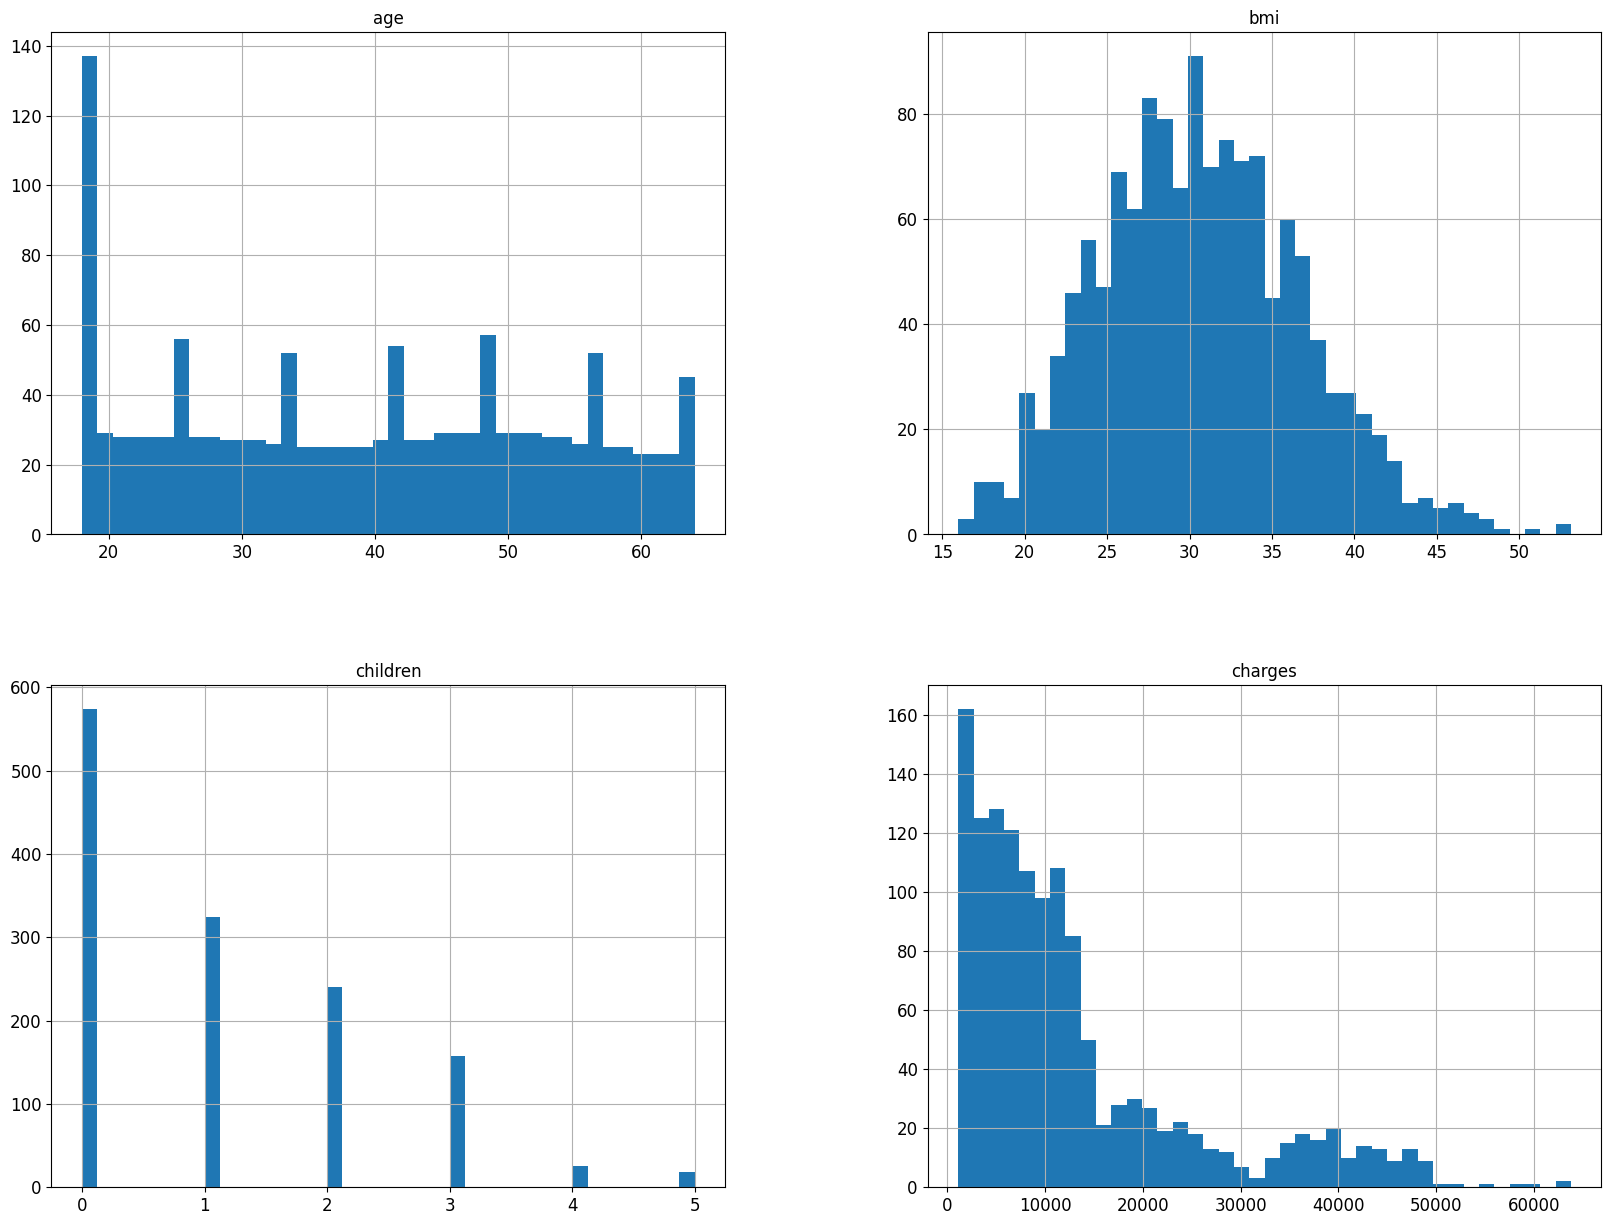

In [137]:
insurance.hist(bins=40, figsize=(20,15))
plt.show()

array([[<Axes: xlabel='charges', ylabel='charges'>,
        <Axes: xlabel='age', ylabel='charges'>,
        <Axes: xlabel='children', ylabel='charges'>,
        <Axes: xlabel='bmi', ylabel='charges'>],
       [<Axes: xlabel='charges', ylabel='age'>,
        <Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='children', ylabel='age'>,
        <Axes: xlabel='bmi', ylabel='age'>],
       [<Axes: xlabel='charges', ylabel='children'>,
        <Axes: xlabel='age', ylabel='children'>,
        <Axes: xlabel='children', ylabel='children'>,
        <Axes: xlabel='bmi', ylabel='children'>],
       [<Axes: xlabel='charges', ylabel='bmi'>,
        <Axes: xlabel='age', ylabel='bmi'>,
        <Axes: xlabel='children', ylabel='bmi'>,
        <Axes: xlabel='bmi', ylabel='bmi'>]], dtype=object)

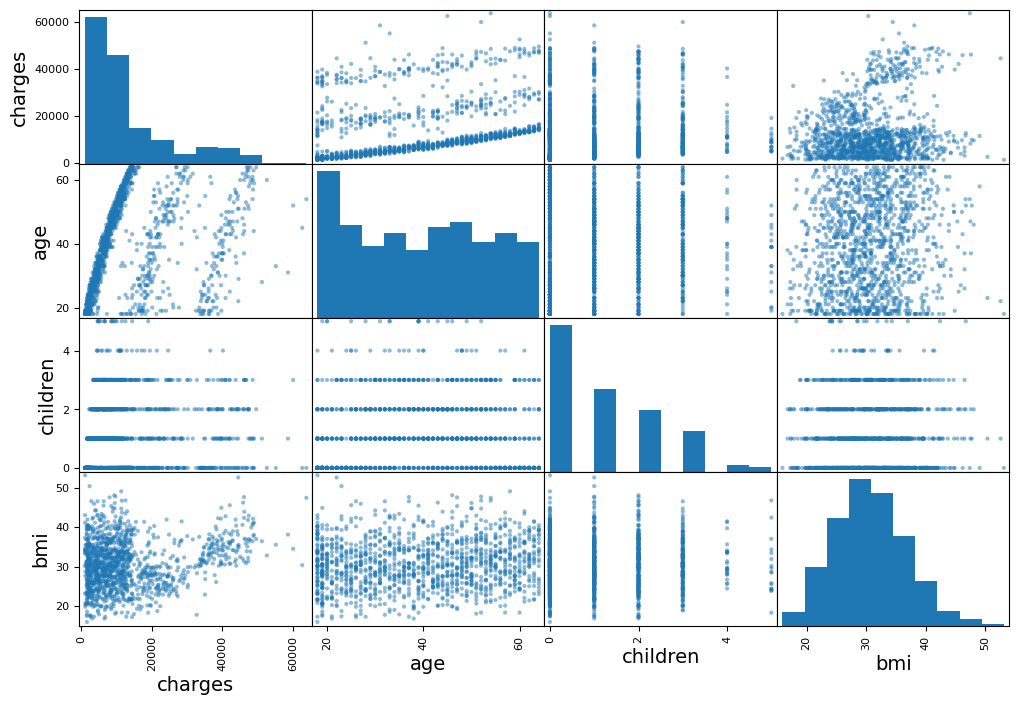

In [138]:
from pandas.plotting import scatter_matrix

attributes = ["charges", "age", "children",
              "bmi"]
scatter_matrix(insurance[attributes], figsize=(12, 8))

In [139]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(insurance, test_size=0.25, random_state=48)

In [140]:
insurance = train_set.drop("charges", axis=1)
insurance_labels = train_set["charges"].copy()

In [141]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

full_pipeline = ColumnTransformer([
        ("cat", OneHotEncoder(), ["sex", "smoker", "region"]),
    ], remainder="passthrough")

insurance_prepared = full_pipeline.fit_transform(insurance)

In [142]:
insurance_prepared

array([[ 0.   ,  1.   ,  0.   , ..., 21.   , 25.7  ,  4.   ],
       [ 1.   ,  0.   ,  1.   , ..., 41.   , 32.6  ,  3.   ],
       [ 1.   ,  0.   ,  1.   , ..., 38.   , 19.95 ,  2.   ],
       ...,
       [ 0.   ,  1.   ,  1.   , ..., 62.   , 39.93 ,  0.   ],
       [ 0.   ,  1.   ,  1.   , ..., 46.   , 33.345,  1.   ],
       [ 0.   ,  1.   ,  1.   , ..., 50.   , 44.77 ,  1.   ]])

In [143]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(insurance_prepared, insurance_labels)

LinearRegression()

In [144]:
some_data = insurance.iloc[:5]
some_labels = insurance_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [26174.23257971  9755.32181762  5348.49222928 10769.14949533
  1045.50984131]


In [145]:
print("Labels:", list(some_labels))

Labels: [17942.106, 7954.517, 7133.9025, 9487.6442, 2150.469]


In [146]:
from sklearn.metrics import root_mean_squared_error

insurance_predictions = lin_reg.predict(insurance_prepared)
lin_rmse = root_mean_squared_error(insurance_labels, insurance_predictions)
lin_rmse

5914.81627179755

In [147]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=48)
tree_reg.fit(insurance_prepared, insurance_labels)

DecisionTreeRegressor(random_state=48)

In [148]:
insurance_predictions = tree_reg.predict(insurance_prepared)
tree_rmse = root_mean_squared_error(insurance_labels, insurance_predictions)
tree_rmse

0.0

In [149]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, insurance_prepared, insurance_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [150]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [5335.46338122 6786.00560673 5734.7418838  6192.17596586 6541.47854467
 6380.18870124 6411.23579809 6138.08940088 7705.25808073 5619.82603198]
Mean: 6284.446339521076
Standard deviation: 635.2931131325208


In [151]:
lin_scores = cross_val_score(lin_reg, insurance_prepared, insurance_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [5684.49534303 4604.56949699 5671.24219971 5747.28683763 6697.19621516
 6540.56368947 5928.27445685 5621.43265128 6336.44769528 6579.81762008]
Mean: 5941.132620548448
Standard deviation: 596.6738143597431


In [152]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=48)
forest_reg.fit(insurance_prepared, insurance_labels)

RandomForestRegressor(random_state=48)

In [153]:
insurance_predictions = forest_reg.predict(insurance_prepared)
forest_rmse = root_mean_squared_error(insurance_labels, insurance_predictions)
forest_rmse

1748.1409958281822

In [154]:
forest_scores = cross_val_score(forest_reg, insurance_prepared, insurance_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [4574.21410971 4449.04947383 4623.28096601 4207.59633849 5057.30851941
 4658.34137409 4726.95004312 4166.82299414 4719.49872227 4447.69248939]
Mean: 4563.075503046774
Standard deviation: 248.61825713209112


In [155]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=48)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(insurance_prepared, insurance_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=48),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [156]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [157]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=30, random_state=48)

In [158]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

6027.126961168663 {'max_features': 2, 'n_estimators': 3}
5257.927054060202 {'max_features': 2, 'n_estimators': 10}
4962.331826683742 {'max_features': 2, 'n_estimators': 30}
5456.760840638964 {'max_features': 4, 'n_estimators': 3}
4759.824275644232 {'max_features': 4, 'n_estimators': 10}
4572.373701407566 {'max_features': 4, 'n_estimators': 30}
5309.445825261637 {'max_features': 6, 'n_estimators': 3}
4754.4504262278615 {'max_features': 6, 'n_estimators': 10}
4584.783256967991 {'max_features': 6, 'n_estimators': 30}
5269.257066394501 {'max_features': 8, 'n_estimators': 3}
4832.518735315853 {'max_features': 8, 'n_estimators': 10}
4625.237186647362 {'max_features': 8, 'n_estimators': 30}
5732.433530271413 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
5256.1797274497485 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
5736.249467220724 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
4995.556230545652 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [159]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.00497304, 0.0041832 , 0.34932251, 0.27846962, 0.00529219,
       0.00409518, 0.005093  , 0.00357926, 0.14144272, 0.18321526,
       0.02033401])

In [160]:
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0]) + list(cat_encoder.categories_[1]) + list(cat_encoder.categories_[2])
attributes = ["age", "bmi", "children"] + cat_one_hot_attribs
print(attributes)
sorted(zip(feature_importances, attributes), reverse=True)

['age', 'bmi', 'children', 'female', 'male', 'no', 'yes', 'northeast', 'northwest', 'southeast', 'southwest']


[(0.3493225134148892, 'children'),
 (0.2784696200299612, 'female'),
 (0.18321526337273333, 'southeast'),
 (0.14144272356894713, 'northwest'),
 (0.020334006075935305, 'southwest'),
 (0.005292189907088901, 'male'),
 (0.005092999356027659, 'yes'),
 (0.0049730420628992045, 'age'),
 (0.004183202404305495, 'bmi'),
 (0.00409518405092742, 'no'),
 (0.0035792557562852627, 'northeast')]

In [161]:
final_model = grid_search.best_estimator_

X_test = test_set.drop("charges", axis=1)
y_test = test_set["charges"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_rmse = root_mean_squared_error(y_test, final_predictions)
final_rmse

5304.154456350814

# Exercises

## 1

In [162]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=4)
grid_search.fit(insurance_prepared, insurance_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=4,
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [163]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

6630.341664376107

In [164]:
grid_search.best_params_

{'C': 10000.0, 'kernel': 'linear'}

## 2

In [165]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, random_state=42, n_jobs=4)
rnd_search.fit(insurance_prepared, insurance_predictions)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=50, n_jobs=4,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000017003454D10>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000017003456540>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [166]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

5643.412014773643

In [167]:
rnd_search.best_params_

{'C': 6287.039489427173, 'gamma': 0.3504567255332862, 'kernel': 'linear'}

## 3

In [168]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [169]:
k = 5

In [170]:
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 2,  3,  8,  9, 10], dtype=int64)

In [171]:
np.array(attributes)[top_k_feature_indices]

array(['children', 'female', 'northwest', 'southeast', 'southwest'],
      dtype='<U9')

In [172]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.3493225134148892, 'children'),
 (0.2784696200299612, 'female'),
 (0.18321526337273333, 'southeast'),
 (0.14144272356894713, 'northwest'),
 (0.020334006075935305, 'southwest')]

In [173]:
from sklearn.pipeline import Pipeline

preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [174]:
insurance_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(insurance)
insurance_prepared_top_k_features[0:3]

array([[ 0.  ,  1.  , 21.  , 25.7 ,  4.  ],
       [ 1.  ,  0.  , 41.  , 32.6 ,  3.  ],
       [ 1.  ,  0.  , 38.  , 19.95,  2.  ]])

In [175]:
insurance_prepared[0:3, top_k_feature_indices]

array([[ 0.  ,  1.  , 21.  , 25.7 ,  4.  ],
       [ 1.  ,  0.  , 41.  , 32.6 ,  3.  ],
       [ 1.  ,  0.  , 38.  , 19.95,  2.  ]])

## 4

In [176]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**rnd_search.best_params_))
])

In [177]:
prepare_select_and_predict_pipeline.fit(insurance, insurance_labels)

Pipeline(steps=[('preparation',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('feature_selection',
                 TopFeatureSelector(feature_importances=array([0.00497304, 0.0041832 , 0.34932251, 0.27846962, 0.00529219,
       0.00409518, 0.005093  , 0.00357926, 0.14144272, 0.18321526,
       0.02033401]),
                                    k=5)),
                ('svm_reg',
                 SVR(C=6287.039489427173, gamma=0.3504567255332862,
                     kernel='linear'))])

In [178]:
some_data = insurance.iloc[:4]
some_labels = insurance_labels.iloc[:4]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [33509.50825723  8381.92566081  6778.46615573 10266.59345883]
Labels:		 [17942.106, 7954.517, 7133.9025, 9487.6442]


## 5

In [179]:
full_pipeline.named_transformers_["cat"].handle_unknown = 'passthrough'

param_grid = [{
    'feature_selection__k': list(range(1, len(feature_importances) + 1))
}]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2, n_jobs=4)
grid_search_prep.fit(insurance, insurance_labels)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preparation',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OneHotEncoder(),
                                                                         ['sex',
                                                                          'smoker',
                                                                          'region'])])),
                                       ('feature_selection',
                                        TopFeatureSelector(feature_importances=array([0.00497304, 0.0041832 , 0.34932251, 0.27846962, 0.00529219,
       0.00409518, 0.005093  , 0.00357926, 0.14144272, 0.18321526,
       0.02033401]),
                                                           k=5)),
                                       ('svm_reg',
                                        SVR(C=6287.039489427173,
                                            gamma=0.3504567255332862,
                                            kernel='linear'))]),
             n_jobs=4,
             param_grid=[{'feature_selection__k': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11]}],
             scoring='neg_mean_squared_error', verbose=2)

In [180]:
grid_search_prep.best_params_

{'feature_selection__k': 4}